<a href="https://colab.research.google.com/github/tony45678/tonyyoon/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [0]:
import cmath 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [0]:
def load_data(path, header):
    data = pd.read_csv(path, header=header)
    return data

# Import Data

**1. Plot the training data**

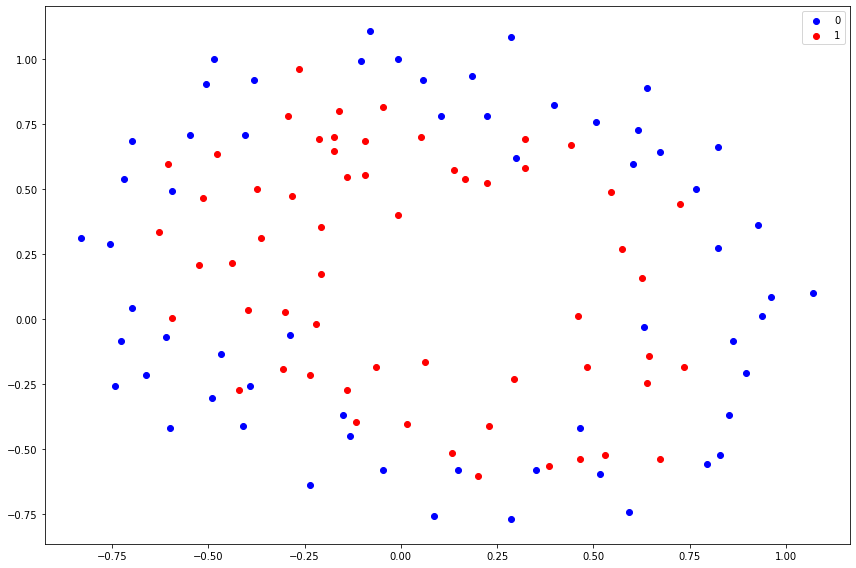

In [9]:
data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

theta = np.array([0., 0., 0.])

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure(figsize=(12, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.legend(['0','1'])
plt.tight_layout()
plt.show()


# Cost Function & Gradient Descent

In [0]:
def map_feature(x1, x2, degree=6):
    map_feature_size = x1.size
    map_feature = np.ones(shape=(map_feature_size, 1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            column = (x1 ** (i - j)) * (x2 ** j)
            map_feature = np.append(map_feature, column, axis=1)   
    return map_feature

In [52]:
x = data[:, :2]

x1 = x[:, [0]]
x2 = x[:, [1]]

maped = map_feature(x1, x2)
print(maped.shape)

(118, 28)


**Cost Function** 

In [0]:
def sigmoid(z):
     return 1 / (1 + np.exp(-z))

In [0]:
def cost_function(theta, x, y, lamb = 1):  
    
    m = len(x)
    zero = 0.000001
    
    #hypothesis to avoid zeros
    parameter = (x.dot(theta))
    hypo = sigmoid(parameter)
    hypo[hypo == 0] = zero
    
    #Intervals to avoid zeros
    interval = 1 - hypo
    interval[interval == 0] = zero
    
    y1 = y * np.log(hypo)
    y0 = (1 - y) * np.log(interval)
    y2 = theta**2
    
    cost = ((-1./m) * np.sum(y1 + y0)) + ((lamb/(2*m)) * np.sum(y2))    
    return cost

In [78]:
theta = np.zeros(maped.shape[1])
y = data[:, 2]

cost = cost_function(theta, maped, y, lamb = 1)
print(cost)

0.6931471805599454


**Gradient Descent**

In [0]:
def gradient_descent(x, y, theta, lamb, tolerance, log=False):
    m = y.size
    episilon = 0.000001
    zero     = 0.000001
    residual = np.ones(tolerance)
    J        = np.zeros(tolerance)
    interact = 0
    converge = False
    
    while not converge:
        
        ' Start adjusting theta values '
        hypo = sigmoid(x.dot(theta))
        error = hypo - y
        
        error[error == 0] = zero
        
        gradient = ((1./m) * (x.T.dot(error))) + ((lamb/(2*m)) * theta)
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' Run the cost function over the data with new theta '
        J[interact] = cost_function(theta, x, y, lamb)
        
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        residual[interact] = step
        
        if interact % 100 == 0 and log:
            ' The main idea here is to minimize the error value when evaluating the hypothesis '
            print('Interaction ' + str(interact) + ', Redidual error output :' + str(J[interact]) + ', Step size: ' + str(step))
        
        if (interact + 1) == tolerance:
            print('Caution! The routine has reached the maximum tolerance! Results may not converge.')
            converge = True
            
        interact = interact + 1
    
    '''
        For j = 0 whe do not sum the last term
    '''
    gradient[0] = gradient[0] - ((lamb/(2*m)) * theta)[0]
        
    return theta, J, interact, residual, gradient

In [85]:
op_theta, cost, it, r, grad = gradient_descent(maped, y, theta, 1, 2000)
print('Initial cost')
print(cost[0])

print('Initial Gradient')
print(grad)

Initial cost
0.6812915551427071
Initial Gradient
[-6.67793403e-03  8.12568222e-08 -4.50150933e-07 -6.29245605e-10
  1.81721521e-06  1.05118342e-06 -1.26892769e-07 -1.56963099e-07
 -1.36211579e-06  1.08716302e-06  8.76760059e-09 -2.27969878e-06
  3.90515046e-07  1.81771148e-07  4.96013112e-07  5.86466148e-07
 -5.10433444e-07 -1.85348382e-06  7.75806602e-07  3.01099494e-07
 -1.09336175e-06  1.91240406e-07 -1.43593393e-06 -5.01865646e-08
 -1.39789288e-06  6.72384371e-07  3.39052775e-07 -1.45569672e-06]
